In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [7]:
df_1 = pd.read_csv("C:/Users/dell/Downloads/house-prices-advanced-regression-techniques (1)/train.csv")
df_2 = pd.read_csv("C:/Users/dell/Downloads/house-prices-advanced-regression-techniques (1)/test.csv")
if 'SalePrice' not in df_2.columns:
    df_2['SalePrice'] = 0
df = pd.concat([df_1, df_2], axis = 0)
df = df.set_index('Id')

In [9]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1        0      2    2008        WD         Normal     208500  
2        0      5    2007        WD         Normal     181500  
3        0      9    2008        WD         Normal     223500  
4        0      2    2006        WD        Abnorml     140000  
5        0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [11]:
df.isnull().sum()[df.isnull().sum()>0]

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType      1766
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

In [13]:
df_null = df[df.isnull().sum()[df.isnull().sum()>0].index]

In [15]:
df_null.head()

MSZoning  LotFrontage Alley Utilities Exterior1st Exterior2nd MasVnrType  \
Id                                                                            
1        RL         65.0   NaN    AllPub     VinylSd     VinylSd    BrkFace   
2        RL         80.0   NaN    AllPub     MetalSd     MetalSd        NaN   
3        RL         68.0   NaN    AllPub     VinylSd     VinylSd    BrkFace   
4        RL         60.0   NaN    AllPub     Wd Sdng     Wd Shng        NaN   
5        RL         84.0   NaN    AllPub     VinylSd     VinylSd    BrkFace   

    MasVnrArea BsmtQual BsmtCond  ... GarageYrBlt GarageFinish  GarageCars  \
Id                                ...                                        
1        196.0       Gd       TA  ...      2003.0          RFn         2.0   
2          0.0       Gd       TA  ...      1976.0          RFn         2.0   
3        162.0       Gd       TA  ...      2001.0          RFn         2.0   
4          0.0       TA       Gd  ...      1998.0          Unf         3.0   
5        350.0       Gd       TA  ...      2000.0          RFn         3.0   

   GarageArea  GarageQual  GarageCond  PoolQC Fence  MiscFeature  SaleType  
Id                                                                          
1       548.0          TA          TA     NaN   NaN          NaN        WD  
2       460.0          TA          TA     NaN   NaN          NaN        WD  
3       608.0          TA          TA     NaN   NaN          NaN        WD  
4       642.0          TA          TA     NaN   NaN          NaN        WD  
5       836.0          TA          TA     NaN   NaN          NaN        WD  

[5 rows x 34 columns]

<Axes: ylabel='Id'>

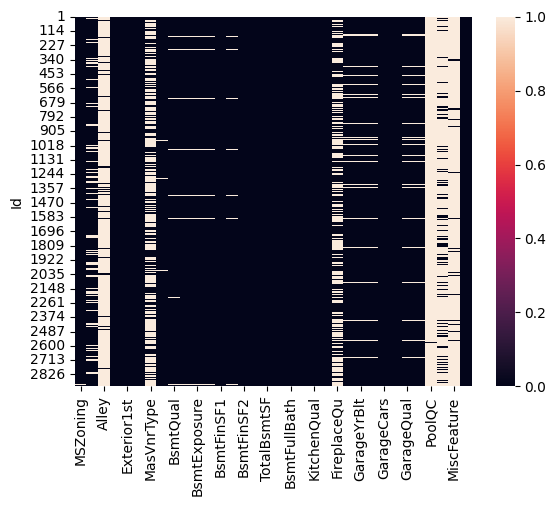

In [17]:
sns.heatmap(df_null.isnull())

In [19]:
df_objects = df[df.select_dtypes(include=['object']).columns]
df = df.drop(df[df_objects.isna().sum()[df_objects.isna().sum() > 1100].index], axis = 1)

In [21]:
df_objects = df_objects.drop(df_objects[df_objects.isna().sum()[df_objects.isna().sum() > 1100].index], axis = 1)
df_objects.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
Id                                                                      
1        RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
2        RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
3        RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
4        RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
5        RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

   Neighborhood Condition1 Condition2  ... Electrical KitchenQual Functional  \
Id                                     ...                                     
1       CollgCr       Norm       Norm  ...      SBrkr          Gd        Typ   
2       Veenker      Feedr       Norm  ...      SBrkr          TA        Typ   
3       CollgCr       Norm       Norm  ...      SBrkr          Gd        Typ   
4       Crawfor       Norm       Norm  ...      SBrkr          Gd        Typ   
5       NoRidge       Norm       Norm  ...      SBrkr          Gd        Typ   

   GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
Id                                                                     
1      Attchd          RFn         TA         TA          Y       WD   
2      Attchd          RFn         TA         TA          Y       WD   
3      Attchd          RFn         TA         TA          Y       WD   
4      Detchd          Unf         TA         TA          Y       WD   
5      Attchd          RFn         TA         TA          Y       WD   

   SaleCondition  
Id                
1         Normal  
2         Normal  
3         Normal  
4        Abnorml  
5         Normal  

[5 rows x 37 columns]

In [23]:
df_objects = df_objects.drop(df_objects[df_objects.isna().sum()[df_objects.isna().sum() > 1100].index], axis = 1)
df_objects = df_objects.fillna('null')
df_objects_encoded = pd.get_dummies(df_objects)

In [25]:
print(df_objects.columns)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [27]:
df_objects['Utilities'].value_counts()

Utilities
AllPub    2916
null         2
NoSeWa       1
Name: count, dtype: int64

In [29]:
df_objects_encoded.head()

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
Id                                                                         
1              False        False        False         True        False   
2              False        False        False         True        False   
3              False        False        False         True        False   
4              False        False        False         True        False   
5              False        False        False         True        False   

    MSZoning_null  Street_Grvl  Street_Pave  LotShape_IR1  LotShape_IR2  ...  \
Id                                                                       ...   
1           False        False         True         False         False  ...   
2           False        False         True         False         False  ...   
3           False        False         True          True         False  ...   
4           False        False         True          True         False  ...   
5           False        False         True          True         False  ...   

    SaleType_New  SaleType_Oth  SaleType_WD  SaleType_null  \
Id                                                           
1          False         False         True          False   
2          False         False         True          False   
3          False         False         True          False   
4          False         False         True          False   
5          False         False         True          False   

    SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
Id                                                                       
1                   False                  False                 False   
2                   False                  False                 False   
3                   False                  False                 False   
4                    True                  False                 False   
5                   False                  False                 False   

    SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
Id                                                                     
1                  False                  True                  False  
2                  False                  True                  False  
3                  False                  True                  False  
4                  False                 False                  False  
5                  False                  True                  False  

[5 rows x 247 columns]

In [31]:
for i in df_objects_encoded.columns:
    if 'null' in i:
        df_objects_encoded = df_objects_encoded.drop(i, axis = 1)
        print(i)

MSZoning_null
Utilities_null
Exterior1st_null
Exterior2nd_null
BsmtQual_null
BsmtCond_null
BsmtExposure_null
BsmtFinType1_null
BsmtFinType2_null
Electrical_null
KitchenQual_null
Functional_null
GarageType_null
GarageFinish_null
GarageQual_null
GarageCond_null
SaleType_null


In [33]:
new_df = pd.concat([df, df_objects_encoded], axis = 1)

In [35]:
len(new_df.columns)

304

In [37]:
len(df.columns), len(df_objects_encoded.columns)

(74, 230)

In [39]:
new_df = new_df.drop(df.select_dtypes(include=['object']), axis = 1)
new_df.isna().sum()[new_df.isna().sum() > 0]

LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64

In [41]:
Mode_columns = ['GarageCars', 'GarageYrBlt', 'BsmtFullBath', 'BsmtHalfBath']
Mean_columns = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF',
                'TotalBsmtSF', 'GarageArea']
for i in Mode_columns:
    new_df[i] = new_df[i].fillna(new_df[i].mode()[0])

for i in Mean_columns:
    new_df[i] = new_df[i].fillna(np.round(new_df[i].mean()))

new_df.isna().sum()[new_df.isna().sum() > 0]

Series([], dtype: int64)

In [43]:
training_data = new_df[0:len(df_1)]
testing_data = new_df[len(df_1):]
testing_data = testing_data.drop(columns='SalePrice')

In [47]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/150.0 MB 2.8 MB/s eta 0:00:54
   ---------------------------------------- 1.3/150.0 MB 2.6 MB/s eta 0:00:58
   ---------------------------------------- 1.6/150.0 MB 2.3 MB/s eta 0:01:04
    --------------------------------------- 2.1/150.0 MB 2.2 MB/s eta 0:01:09
    --------------------------------------- 2.6/150.0 MB 2.3 MB/s eta 0:01:06
    --------------------------------------- 2.9/150.0 MB 2.3 MB/s eta 0:01:05
    --------------------------------------- 3.7/150.0 MB 2.4 MB/s eta 0:01:02
   - -------------------------------------- 4.2/150.0 MB 2.4 MB/s eta 0:01:01
   - -------------------------------------- 4.7/150.0 MB 2.4 MB/s eta 0:01:00
   - -------------------------------------- 5.2/150.0 MB 2.4 MB/s eta 0:01:00
   - -------------------------------------- 5.5/150.0 MB 2.4 MB/s eta 0:01:00


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [51]:
x = training_data.drop(columns='SalePrice')
y = training_data['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
y_train = np.reshape(y_train,(-1,1))
y_test = np.reshape(y_test,(-1,1))
x_train.shape, y_train.shape

((1168, 266), (1168, 1))

In [53]:
model_1 = LinearRegression()
model_1.fit(x, y)
y_pred = model_1.predict(x_test)
mean_squared_error(y_test, y_pred)

409585680.7183859

In [55]:
model_2 = XGBRegressor(n_estimators=1000, learning_rate=0.1)
model_2.fit(x, y)
y_pred = model_2.predict(x_test)
mean_squared_error(y_test, y_pred)

6227.617281456516

In [56]:
model_3 = RandomForestRegressor(n_estimators=100)
model_3.fit(x, y)
y_pred = model_3.predict(x_test)
mean_squared_error(y_test, y_pred)

159692634.3345209

In [58]:
pred = model_2.predict(testing_data)
final = pd.DataFrame()
final['Id'] = testing_data.index
final['SalePrice'] = pred
#write DataFrame to a csv file without index
final.to_csv('output.csv', index=False)